In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [122]:
# Constants
U_G = 12 # Geostrophic velocity [m/s]
C_star = 4.5 # Friction velocity constant [-]
f = 1*10**(-4) # Coriolis parameter [1/s]
k = 0.4 # Von Karman constant [-]
z_h = 100 # hub height [m]
delta_ibl_0 = 100 # Initial boundary layer thickness [m]
z_0lo = 0.0001 # surface rughness length [m] 
C_T = 0.7 # Thrust coefficient [-]
D = 100 # Rotor diameter [m]
s_x = 7 # Streamwise distance [D]
s_y = 7 # Spanwise distance [D]
C_P = 0.4 # Power coefficient [-]
rho = 1.2 # Air density [kg/m^3]

Eddy Viscosity: $ v_w^* = \frac{V_T}{\kappa u_* z_h} $

Wake Expansion Parameter: $ \beta = \frac{v_w^*}{1 + v_w^*} $

In [123]:
# Planform thrust coefficient
c_ft = (np.pi * C_T)/(4*s_x*s_y)
print("Planform thrust coefficient: ", round(c_ft,3), "[-]")

# Eddy viscosity
v_w_star = 28 * np.sqrt(1/2*c_ft)
print("Eddy Viscosity: ", round(v_w_star,2), "[-]")

# Wake Expansion Parameter
beta = v_w_star / (1 + v_w_star)
print("Wake Expansion Parameter: ", round(beta,2), "[-]")

Planform thrust coefficient:  0.011 [-]
Eddy Viscosity:  2.1 [-]
Wake Expansion Parameter:  0.68 [-]


Effective Roughness height: $ z_{0,hi} = z_h \left( 1+\frac{D}{2z_h} \right)^{\beta} \cdot \exp \left( - \left[ \frac{c_{ft}}{2{\kappa^2}}+ \left( \ln \left[ \frac{z_h}{z_{0,lo}} \left( 1-\frac{D}{2z_h} \right) ^{\beta} \right] \right)^{-2} \right]^{-\frac{1}{2}} \right) $

Friction Velocity: $ u_* = \frac{\kappa U_G}{\ln \left( \frac{U_G}{f z_0} \right) - C_*}  $

In [124]:
# Effective Roughness height
z_0hi = z_h * (1 + D/(2 * z_h))**beta * np.exp(-(c_ft/(2 * k**2) + (np.log(z_h / z_0lo * (1 - D/(2 * z_h))**beta))**-2)**-0.5)
print("Effective Roughness height: ", round(z_0hi, 4), "m")

# Friction Velocity
u_star_lo = (k * U_G) / (np.log(U_G / (f * z_0lo)) - C_star)
u_star_hi = (k * U_G) / (np.log(U_G / (f * z_0hi)) - C_star)

print("Friction Velocity lo: ", round(u_star_lo, 4), "m/s")
print("Friction Velocity hi: ", round(u_star_hi, 4), "m/s")

Effective Roughness height:  0.9245 m
Friction Velocity lo:  0.2926 m/s
Friction Velocity hi:  0.6599 m/s


In [125]:
U_h0 = u_star_lo / k * np.log(z_h / z_0lo)
print('Unperturbed wind speed: ', round(U_h0, 2), 'm/s')

U_hT = u_star_hi / k * np.log((z_h / z_0hi) * ((1 + D/(2*z_h))**beta))
print('Wind speed (fully developed): ', round(U_hT, 2), 'm/s')

Unperturbed wind speed:  10.11 m/s
Wind speed (fully developed):  8.18 m/s


Single Turbine Power: $ P = C_P \frac{\rho}{2} U_{hT} \pi \frac{D^2}{4}$

In [126]:
P_0 = C_P * rho/2 * U_h0**3 * np.pi * D**2 / 4
print("Ideal Power: ", round(P_0/1000000, 2), "MW")

P = 0.4 * 1.2/2 * U_hT**3 * np.pi * D**2 / 4
print("Power (fully developed): ", round(P/1000000, 2), "MW")

P_P0 = (U_hT / U_h0)**3

print('\nPower ratio P/P0: ', round(P_P0, 2))

Ideal Power:  1.95 MW
Power (fully developed):  1.03 MW

Power ratio P/P0:  0.53


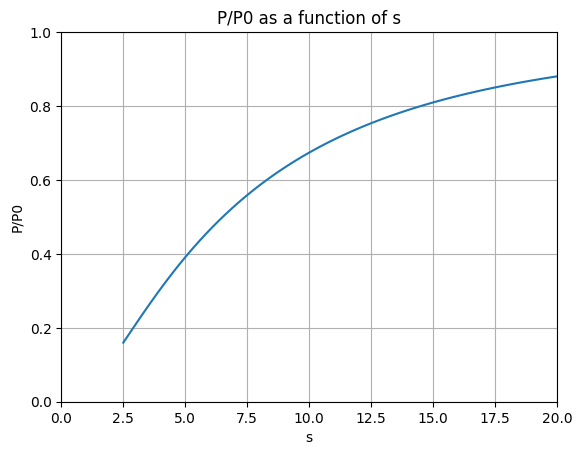

In [127]:
s_values = np.linspace(2.5, 20, 100)
P_P0_values = []

for s in s_values:
    s_x_local = s**2 / s_y
    c_ft_local = (np.pi * C_T) / (4 * s_x_local * s_y)
    v_w_star_local = 28 * np.sqrt(1 / 2 * c_ft_local)
    beta_local = v_w_star_local / (1 + v_w_star_local)
    z_0hi_local = z_h * (1 + D / (2 * z_h))**beta_local * np.exp(-(c_ft_local / (2 * k**2) + (np.log(z_h / z_0lo * (1 - D / (2 * z_h))**beta_local))**-2)**-0.5)
    u_star_lo_local = (k * U_G) / (np.log(U_G / (f * z_0lo)) - C_star)
    u_star_hi_local = (k * U_G) / (np.log(U_G / (f * z_0hi_local)) - C_star)
    U_h0_local = u_star_lo_local / k * np.log(z_h / z_0lo)
    U_hT_local = u_star_hi_local  / k * np.log((z_h / z_0hi_local) * (1 + D / (2 * z_h))**beta_local)
    P_P0_local = (U_hT_local / U_h0_local)**3
    P_P0_values.append(P_P0_local)

plt.plot(s_values, P_P0_values)
plt.xlim(0, 20)
plt.ylim(0, 1)
plt.xlabel('s')
plt.ylabel('P/P0')
plt.title('P/P0 as a function of s')
plt.grid(True)
plt.show()


Internal Boundary Layer Height as function of downstream distance: $ \frac{\delta_{ibl}(x)}{z_{0,hi}} = \frac{\delta_{ibl}(0)}{z_{0,hi}} + (\frac{x}{z_{0,hi}})^{\frac{4}{5}} $

Friction velocity as function of downstream distance: $ u_*(x) = u_* \frac{\ln \left( \frac{\delta_{ibl}(x)}{z_{0,lo}} \right)}{\ln \left( \frac{\delta_{ibl}(x)}{z_{0,hi}} \right)}, \;\;\; \delta_{ibl}(x) < H^*_G $



Hub-height velocity as a function of downstream distance: $ U_{hT}(x) = \frac{u_*}{\kappa} \frac{\ln \left( \frac{\delta_{ibl}(x)}{z_{0,lo}} \right)}{\ln \left( \frac{\delta_{ibl}(x)}{z_{0,hi}} \right)} \ln \left[ \left( \frac{z_h}{z_{0,hi}} \right) \left( 1 + \frac{D}{2 z_h} \right)^{\beta} \right] $

In [128]:
# Internal boundary Layer height as a function of downstream distance (x = 0 is upstream edge of wind farm)
x = 1 * D *s_x # Downstream distance from upstream edge [m]
delta_ibl_x = delta_ibl_0 + z_0hi * (x/z_0hi)**(4/5)

x_H_G = (((z_0hi/z_0lo)**(-u_star_hi/(u_star_lo - u_star_hi)) * z_0lo - z_h)/z_0hi)**(5/4) * z_0hi
H_G = z_h + z_0hi * (x_H_G / z_0hi) ** (4 / 5)

if delta_ibl_x >= H_G:
    delta_ibl_x = H_G

print("IBL height as function of downstream distance: ", round(delta_ibl_x, 2), "m")

IBL height as function of downstream distance:  285.89 m


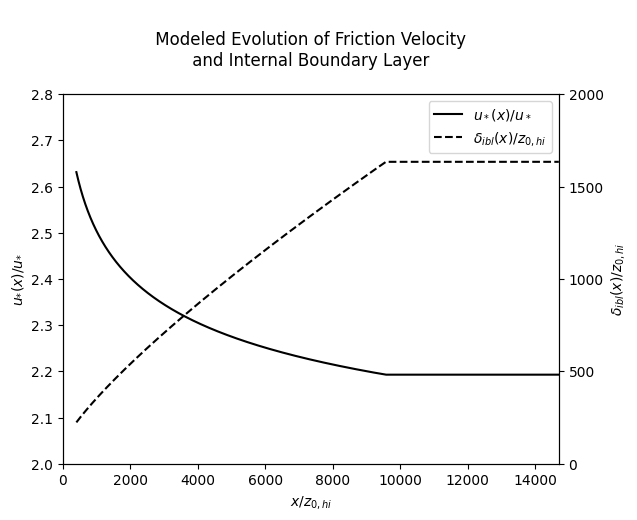

In [129]:
from FrictionIBLheight import FrictionIBLheight
FrictionIBLheight()

Hub-height velocity as a function of downstream distance:  9.4 m/s


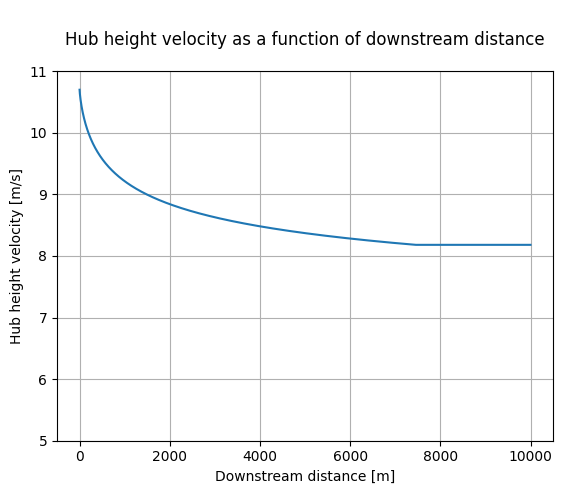

In [130]:
# Hub-height velocity as a function of downstream distance
U_hT_x = (u_star_lo / k) * (np.log(delta_ibl_x / z_0lo) / np.log(delta_ibl_x / z_0hi)) * np.log((z_h / z_0hi) * (1 + D/(2 * z_h))**beta)
print("Hub-height velocity as a function of downstream distance: ", round(U_hT_x, 2), "m/s")

from HubHeightVelocity import U_hT
U_hT(x, delta_ibl_0, z_0hi, k, z_0lo, u_star_lo, z_h, D, beta, H_G)